# Stock Prediction of an Apple company using LSTM model 

#import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


#Load your dataset:                                          

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
df.shape

(10468, 7)

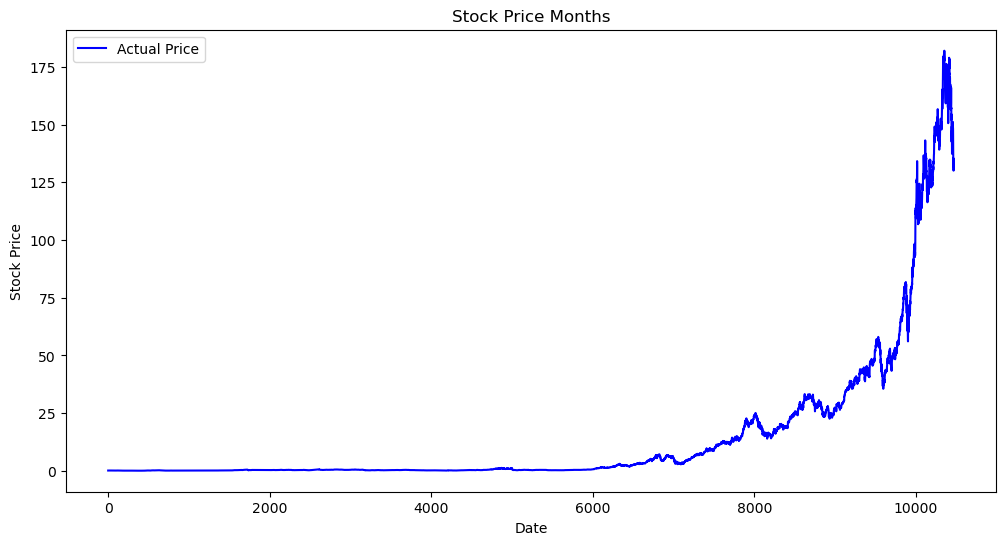

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, closing_prices, label='Actual Price', color='blue')
plt.title('Stock Price Months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [6]:
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    return scaled_data, scaler

# Extract the 'Close' prices
closing_prices = df['Close'].values
scaled_data, scaler = preprocess_data(closing_prices)


Create sequences of data for training:

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length - 90):  # Predicting for 3 months (90 days) into the future
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length:i+sequence_length+90]  # 90 days ahead
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 30  # You can adjust this value
X, y = create_sequences(scaled_data, sequence_length)


Build the LSTM model:

In [8]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(90))  # 90 days ahead prediction
model.compile(optimizer='adam', loss='mse')


Train the model:

In [9]:
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
324/324 [==============================] - 5s 10ms/step - loss: 0.0055
Epoch 2/50
324/324 [==============================] - 3s 10ms/step - loss: 4.9911e-04
Epoch 3/50
324/324 [==============================] - 3s 11ms/step - loss: 4.4403e-04
Epoch 4/50
324/324 [==============================] - 4s 12ms/step - loss: 4.2853e-04
Epoch 5/50
324/324 [==============================] - 3s 10ms/step - loss: 4.3586e-04
Epoch 6/50
324/324 [==============================] - 3s 11ms/step - loss: 4.3117e-04
Epoch 7/50
324/324 [==============================] - 3s 10ms/step - loss: 4.3351e-04
Epoch 8/50
324/324 [==============================] - 4s 12ms/step - loss: 4.2174e-04
Epoch 9/50
324/324 [==============================] - 4s 12ms/step - loss: 4.2624e-04
Epoch 10/50
324/324 [==============================] - 3s 11ms/step - loss: 4.1741e-04
Epoch 11/50
324/324 [==============================] - 3s 11ms/step - loss: 4.1450e-04
Epoch 12/50
324/324 [==============================] - 4

Make predictions for the next 3 months:

In [11]:

# Use the most recent data to make predictions
most_recent_data = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
predicted_data = model.predict(most_recent_data)

# Reshape the predicted_data to 2D
predicted_data_2d = predicted_data.reshape(-1, 1)

# Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(predicted_data_2d)



1/1 [==============================] - 0s 19ms/step


Plot the predicted stock prices for the next 3 months:

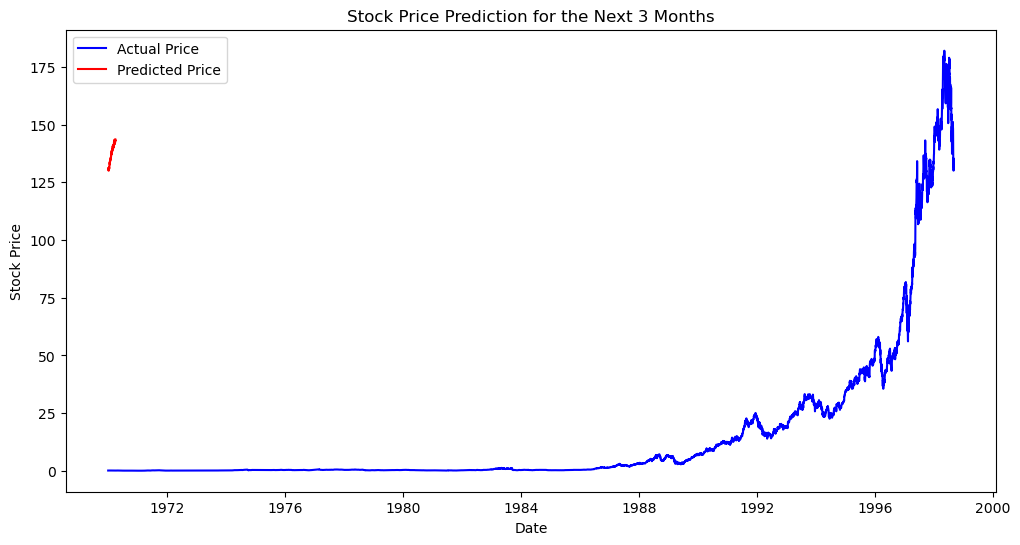

In [12]:
# Generate dates for the next 3 months
date_range = pd.date_range(start=df.index[-1], periods=90, freq='D')

# Create a DataFrame for the predicted prices
predicted_df = pd.DataFrame(predicted_prices, index=date_range, columns=['Predicted Price'])

# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, closing_prices, label='Actual Price', color='blue')
plt.plot(predicted_df.index, predicted_df['Predicted Price'], label='Predicted Price', color='red')
plt.title('Stock Price Prediction for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
